In [93]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# 修改默认字体
font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal'}
plt.rc('font', **font)
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

In [94]:
# 定义全局变量
miu = 0.01 
g = 9.8
m_ren=70
m_che=7
m = m_ren + m_che
r = 0.66   # 车轮半径
c = 0.25   # 一个未知系数
w_shoulder = 0.46    # 肩宽
l_leg = 1.0        # 腿长
s = w_shoulder * l_leg   # 人加车正对面积
rou = 1.205   # kg/m^3

sigma1 = 42 # 表示有氧呼吸的速率  # sigma2表示无氧呼吸的速率，以函数形式给出

W_max = 2403.5e3  # 最大的功率
alpha = 0.1   # 一个比率

In [95]:
# 阻力函数
f1 = miu*m*g/(2*r)

def f2(v):
    return 1/2*c*rou*s*v*v

def f_zu(v):
    return f1 + f2(v)

def sigma2(P):       # P是人体功率， v是当前速度
    if P < sigma1:
        return 0
    else:
        return P - sigma1 

def T(P):
    return W_max / ( (2.38969595e-06*(P-sigma1)**3+3.2) *P)

In [96]:
# 初始化
t=[]
v=[]
p=[]
x=[]
f=[]
k=[]
E=[]
kk=[]
kk.append(0)
sigma=[]
t.append(0)
v.append(0)
p.append(500)
x.append(0)
f.append(f1)
k.append(0)
E.append(0)
sigma.append(sigma2(p[0]))
flag=1
# 开始迭代
for i in range(1,30):
    t_temp = t[i-1]+1;  t.append(t_temp)
    p_temp=500
    p.append(p_temp)
    v_temp = math.sqrt( 2*(p[i-1]-f[i-1]*v[i-1])/m + v[i-1]**2 ); v.append(v_temp)
    x_temp = x[i-1] + (v[i-1] + v[i])/2;    x.append(x_temp)
    f_temp = f_zu(v[i]);    f.append(f_temp)
    E_temp = E[i-1] + p[i-1] - sigma1;  E.append(E_temp)
    k_temp = (E[i-1] / 2e6); k.append(k_temp//0.1 /10); kk.append(k_temp)

    if(x_temp>140000 and flag):
        print(t_temp)
        flag = 0
    # print('时刻i: ', ' t=',t[i],' p=',p[i],' v=',v[i],' x=',x[i],' f=',f[i],' E=',E[i],' k=',k[i])

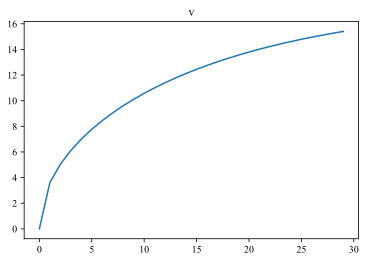

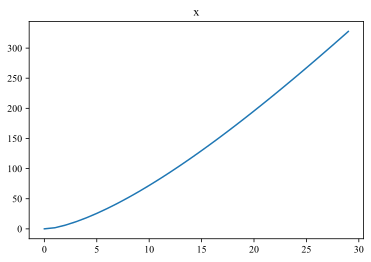

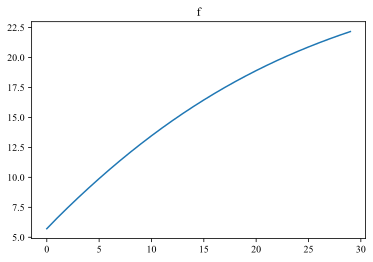

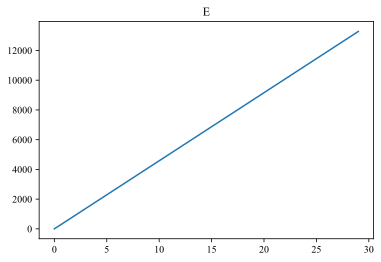

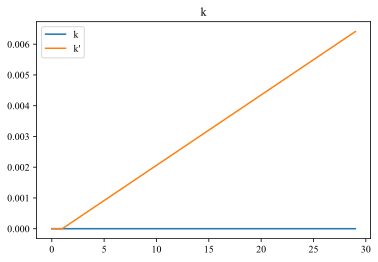

In [98]:
# 绘图

plt.plot(t,v)
plt.title("v")
plt.show()

plt.plot(t,x)
plt.title("x")
plt.show()

plt.plot(t,f)
plt.title("f")
plt.show()

plt.plot(t,E)
plt.title("E")
plt.show()

plt.plot(t,k,label='k')
plt.plot(t,kk,label="k'")

plt.title("k")
plt.legend()
plt.show()
